# Data

1. Deskripsi:   Data Bulanan Covid-19 Bulan Januari Tahun 2021
2. Sumber:      https://data.jakarta.go.id/dataset/rekap-data-bulanan-covid-19-per-kelurahan-provinsi-dki-jakarta-tahun-2021/resource/1477e386a9fea1c6fc3cd32b0814f85c
3. Format:      csv (Comma-seperated values)
4. Dimensi:     26433 baris dan 9 kolom
5. Ukuran:      2.5 MB

Penjelasan variabel yang ada pada dataset ini:
1. tanggal : Tanggal
2. id_kel : ID Kelurahan
3. nama_provinsi : Nama Provinsi
4. nama_kota : Nama Kota
5. nama_kecamatan : Nama Kecamatan
6. nama_kelurahan : Nama Kelurahan
7. kategori : Kategori pasien Covid - 19
8. sub_kategori : Sub Kategori dari kategori awal yang masih terlalu luas menjadi lebih rinci
9. jumlah : Jumlah orang


In [1]:
# Kita import module yang diperlukan untuk melakukan analisis data dan visualisasi data
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Kita baca csv file dan menyimpannya dalam raw_data dengan format DataFrame
raw_data = pd.read_csv("rekap-data-bulanan-covid-19-bulan-januari-tahun-2021.csv")

In [102]:
raw_data.info()
# 1. tanggal : Tanggal
# 2. id_kel : ID Kelurahan
# 3. nama_provinsi : Nama Provinsi
# 4. nama_kota : Nama Kota
# 5. nama_kecamatan : Nama Kecamatan
# 6. nama_kelurahan : Nama Kelurahan
# 7. kategori : Kategori pasien Covid - 19
# 8. sub_kategori : Sub Kategori dari kategori awal yang masih terlalu luas menjadi lebih rinci
# 9. jumlah : Jumlah orang

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26414 entries, 0 to 26432
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tanggal         26414 non-null  object
 1   id_kel          26414 non-null  int64 
 2   nama_provinsi   26414 non-null  object
 3   nama_kota       26414 non-null  object
 4   nama_kecamatan  26414 non-null  object
 5   nama_kelurahan  26414 non-null  object
 6   kategori        26414 non-null  object
 7   sub_kategori    26414 non-null  object
 8   jumlah          26414 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 2.0+ MB


In [3]:
# Kita print sample data agar dapat memperoleh gambar besar data:
raw_data.head()

,tanggal,id_kel,nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,kategori,sub_kategori,jumlah
0,2021-01-02,3172051003,DKI JAKARTA,JAKARTA UTARA,PADEMANGAN,ANCOL,SUSPEK,Perawatan RS,2
1,2021-01-02,3173041007,DKI JAKARTA,JAKARTA BARAT,TAMBORA,ANGKE,SUSPEK,Perawatan RS,2
2,2021-01-02,3175041005,DKI JAKARTA,JAKARTA TIMUR,KRAMAT JATI,BALE KAMBANG,SUSPEK,Perawatan RS,1
3,2021-01-02,3175031003,DKI JAKARTA,JAKARTA TIMUR,JATINEGARA,BALI MESTER,SUSPEK,Perawatan RS,0
4,2021-01-02,3175101006,DKI JAKARTA,JAKARTA TIMUR,CIPAYUNG,BAMBU APUS,SUSPEK,Perawatan RS,0


In [5]:
# Range tanggal dan frekuensi setiap tanggal adalah berikut:
raw_data["tanggal"].value_counts(dropna=False)
# Dari ini, kami memperoleh informasi bahwa pengambilan tidak dilakukan setiap hari, melainkan setiap 7 hari
# mulai dari tanggal 2 Januari sehingga waktunya adalah tanggal 2, 9, 16, 23, dan 30.

# Terdapat 19 tanggal yang kosong.

2021-01-23    5607
2021-01-30    5607
2021-01-09    5073
2021-01-16    5073
2021-01-02    5054
NaN             19
Name: tanggal, dtype: int64

In [6]:
# Kita hapus 19 tanggal tersebut.
raw_data.dropna(inplace=True)

In [7]:
# Check apakah ada yang kosong?
raw_data["id_kel"].hasnans

False

In [8]:
# Apakah ada 1 provinsi saja (DKI Jakarta)?
raw_data["nama_provinsi"].value_counts(dropna=False)

DKI JAKARTA    26414
Name: nama_provinsi, dtype: int64

In [9]:
# Apakah ada 6 kota saja (Jakarta Timur, Jakarta Selatan, Jakarta Barat, Jakarta Pusat, Jakarta Utara, Kepulauan Seribu)
raw_data["nama_kota"].value_counts(dropna=False)

JAKARTA TIMUR         6435
JAKARTA SELATAN       6435
JAKARTA BARAT         5525
JAKARTA PUSAT         4356
JAKARTA UTARA         3069
KAB.ADM.KEP.SERIBU     594
Name: nama_kota, dtype: int64

In [10]:
# Apakah ada yang kosong? Apakah semua kecamatan eksis?
print(raw_data["nama_kecamatan"].hasnans)
raw_data["nama_kecamatan"].value_counts(dropna=False)

False


TAMBORA                1089
KEBAYORAN BARU          990
KEMAYORAN               792
SETIA BUDI              792
JATINEGARA              792
CIPAYUNG                792
TAMAN SARI              792
CILINCING               693
KEBON JERUK             693
DUREN SAWIT             693
PULO GADUNG             693
PASAR MINGGU            693
TANJUNG PRIOK           693
KRAMAT JATI             693
CAKUNG                  693
TANAH ABANG             693
TEBET                   693
GROGOL PETAMBURAN       674
PALMERAH                594
CENGKARENG              594
KEMBANGAN               594
KEBAYORAN LAMA          594
KOJA                    594
PANCORAN                594
JAGAKARSA               594
GAMBIR                  594
MATRAMAN                594
SENEN                   594
KALI DERES              495
PENJARINGAN             495
SAWAH BESAR             495
CILANDAK                495
MAMPANG PRAPATAN        495
PASAR REBO              495
MAKASAR                 495
PESANGGRAHAN        

In [11]:
# Apakah ada yang kosong? Apakah semua kelurahan eksis?
print(raw_data["nama_kelurahan"].hasnans)
raw_data["nama_kelurahan"].value_counts(dropna=False)

False


ANCOL             99
PENJARINGAN       99
PASAR MANGGIS     99
PASAR MINGGU      99
PASEBAN           99
                  ..
KAPUK MUARA       99
KARANG ANYAR      99
KARET             99
KARET KUNINGAN    99
WIJAYA KUSUMA     80
Name: nama_kelurahan, Length: 267, dtype: int64

In [12]:
# Apakah kategori masuk akal?
raw_data["kategori"].value_counts(dropna=False)

SUSPEK               5336
PROBABLE             5336
POSITIF              4536
PELAKU PERJALANAN    4002
DISCARDED            4002
KONTAK ERAT          3202
Name: kategori, dtype: int64

In [13]:
# Apakah sub_kategori masuk akal?
raw_data["sub_kategori"].value_counts(dropna=False)

Isolasi di Rumah      6670
Selesai Isolasi       6670
Perawatan RS          4536
Meninggal             2668
Suspek Meninggal      1334
Probable Meninggal    1334
Dirawat               1334
Sembuh                1334
Self Isolation         534
Name: sub_kategori, dtype: int64

In [14]:
# Apakah ada yang kosong? Apakah ada nilai negatif? Apakah nilai terbesar wajar?
print("Apakah ada yang kosong?", raw_data["jumlah"].hasnans)
print("Nilai terkecil:", raw_data["jumlah"].min())
print("Nilai terbesar:", raw_data["jumlah"].max())
raw_data["jumlah"].value_counts(dropna=False)

Apakah ada yang kosong? False
Nilai terkecil: 0
Nilai terbesar: 5576


0       10794
1        1333
2         955
3         697
4         536
        ...  
2390        1
3660        1
934         1
2052        1
1150        1
Name: jumlah, Length: 2044, dtype: int64

Data kita dalam format yang kurang bagus karena 1 kelurahan bisa memiliki banyak barisan. Maka untuk lebih rapih, dibuat tabel baru dengan 1 kelurahan memiliki 1 barisan yang
mengandung informasi tentang
1. Jumlah pasien positif yang sedang dirawat.
2. Jumlah pasien positif yang sedang sembuh.
3. Jumlah pasien positif yang sedang meninggal.
4. Jumlah pasien positif yang sedang self isolation.
5. Jumlah pasien positif total.

Karena data kita mengandung 5 tanggal (2, 9, 16, 23, 30), kita buat 6 tabel:
1. 5 tabel yang memuat kelima tanggal tersebut masing-masing (data2, data9, data16, data23, data30).
2. 1 tabel yang memuat statistik keseluruhan (data).

In [15]:
data = pd.DataFrame({"Kelurahan":"", "Dirawat":int(),"Sembuh":int(),"Meninggal":int(),"Self Isolation":int(), "Jumlah Positif":int()}, index=[])
data["Kelurahan"] = raw_data["nama_kelurahan"].unique()
data.set_index("Kelurahan", inplace=True)

data["Dirawat"], data["Sembuh"], data["Meninggal"], data["Self Isolation"], data["Jumlah Positif"]  = 0, 0, 0, 0, 0

for index, row in raw_data.iterrows():
    if row["kategori"] == "POSITIF":
        data.loc[row["nama_kelurahan"], "Jumlah Positif"] += row["jumlah"]

        if row["sub_kategori"] == "Dirawat":
            data.loc[row["nama_kelurahan"], "Dirawat"] += row["jumlah"]
        elif row["sub_kategori"] == "Sembuh":
            data.loc[row["nama_kelurahan"], "Sembuh"] += row["jumlah"]
        elif row["sub_kategori"] == "Meninggal":
            data.loc[row["nama_kelurahan"], "Meninggal"] += row["jumlah"]
        elif row["sub_kategori"] == "Self Isolation":
            data.loc[row["nama_kelurahan"], "Self Isolation"] += row["jumlah"]
    

In [16]:
data2 = pd.DataFrame({"Kelurahan":"", "Dirawat":int(),"Sembuh":int(),"Meninggal":int(),"Self Isolation":int(), "Jumlah Positif":int()}, index=[])
data2["Kelurahan"] = raw_data["nama_kelurahan"].unique()
data2.set_index("Kelurahan", inplace=True)

data2["Dirawat"], data2["Sembuh"], data2["Meninggal"], data2["Self Isolation"], data2["Jumlah Positif"]  = 0, 0, 0, 0, 0

for index, row in raw_data.iterrows():
    if row["kategori"] == "POSITIF" and row["tanggal"] == "2021-01-02":
        data2.loc[row["nama_kelurahan"], "Jumlah Positif"] += row["jumlah"]

        if row["sub_kategori"] == "Dirawat":
            data2.loc[row["nama_kelurahan"], "Dirawat"] += row["jumlah"]
        elif row["sub_kategori"] == "Sembuh":
            data2.loc[row["nama_kelurahan"], "Sembuh"] += row["jumlah"]
        elif row["sub_kategori"] == "Meninggal":
            data2.loc[row["nama_kelurahan"], "Meninggal"] += row["jumlah"]
        elif row["sub_kategori"] == "Self Isolation":
            data2.loc[row["nama_kelurahan"], "Self Isolation"] += row["jumlah"]
    

In [17]:
data9 = pd.DataFrame({"Kelurahan":"", "Dirawat":int(),"Sembuh":int(),"Meninggal":int(),"Self Isolation":int(), "Jumlah Positif":int()}, index=[])
data9["Kelurahan"] = raw_data["nama_kelurahan"].unique()
data9.set_index("Kelurahan", inplace=True)

data9["Dirawat"], data9["Sembuh"], data9["Meninggal"], data9["Self Isolation"], data9["Jumlah Positif"]  = 0, 0, 0, 0, 0

for index, row in raw_data.iterrows():
    if row["kategori"] == "POSITIF" and row["tanggal"] == "2021-01-09":
        data9.loc[row["nama_kelurahan"], "Jumlah Positif"] += row["jumlah"]

        if row["sub_kategori"] == "Dirawat":
            data9.loc[row["nama_kelurahan"], "Dirawat"] += row["jumlah"]
        elif row["sub_kategori"] == "Sembuh":
            data9.loc[row["nama_kelurahan"], "Sembuh"] += row["jumlah"]
        elif row["sub_kategori"] == "Meninggal":
            data9.loc[row["nama_kelurahan"], "Meninggal"] += row["jumlah"]
        elif row["sub_kategori"] == "Self Isolation":
            data9.loc[row["nama_kelurahan"], "Self Isolation"] += row["jumlah"]
    

In [18]:
data16 = pd.DataFrame({"Kelurahan":"", "Dirawat":int(),"Sembuh":int(),"Meninggal":int(),"Self Isolation":int(), "Jumlah Positif":int()}, index=[])
data16["Kelurahan"] = raw_data["nama_kelurahan"].unique()
data16.set_index("Kelurahan", inplace=True)

data16["Dirawat"], data16["Sembuh"], data16["Meninggal"], data16["Self Isolation"], data16["Jumlah Positif"]  = 0, 0, 0, 0, 0

for index, row in raw_data.iterrows():
    if row["kategori"] == "POSITIF" and row["tanggal"] == "2021-01-16":
        data16.loc[row["nama_kelurahan"], "Jumlah Positif"] += row["jumlah"]

        if row["sub_kategori"] == "Dirawat":
            data16.loc[row["nama_kelurahan"], "Dirawat"] += row["jumlah"]
        elif row["sub_kategori"] == "Sembuh":
            data16.loc[row["nama_kelurahan"], "Sembuh"] += row["jumlah"]
        elif row["sub_kategori"] == "Meninggal":
            data16.loc[row["nama_kelurahan"], "Meninggal"] += row["jumlah"]
        elif row["sub_kategori"] == "Self Isolation":
            data16.loc[row["nama_kelurahan"], "Self Isolation"] += row["jumlah"]
    

In [19]:
data23 = pd.DataFrame({"Kelurahan":"", "Dirawat":int(),"Sembuh":int(),"Meninggal":int(),"Self Isolation":int(), "Jumlah Positif":int()}, index=[])
data23["Kelurahan"] = raw_data["nama_kelurahan"].unique()
data23.set_index("Kelurahan", inplace=True)

data23["Dirawat"], data23["Sembuh"], data23["Meninggal"], data23["Self Isolation"], data23["Jumlah Positif"]  = 0, 0, 0, 0, 0

for index, row in raw_data.iterrows():
    if row["kategori"] == "POSITIF" and row["tanggal"] == "2021-01-23":
        data23.loc[row["nama_kelurahan"], "Jumlah Positif"] += row["jumlah"]

        if row["sub_kategori"] == "Dirawat":
            data23.loc[row["nama_kelurahan"], "Dirawat"] += row["jumlah"]
        elif row["sub_kategori"] == "Sembuh":
            data23.loc[row["nama_kelurahan"], "Sembuh"] += row["jumlah"]
        elif row["sub_kategori"] == "Meninggal":
            data23.loc[row["nama_kelurahan"], "Meninggal"] += row["jumlah"]
        elif row["sub_kategori"] == "Self Isolation":
            data23.loc[row["nama_kelurahan"], "Self Isolation"] += row["jumlah"]
    

In [20]:
data30 = pd.DataFrame({"Kelurahan":"", "Dirawat":int(),"Sembuh":int(),"Meninggal":int(),"Self Isolation":int(), "Jumlah Positif":int()}, index=[])
data30["Kelurahan"] = raw_data["nama_kelurahan"].unique()
data30.set_index("Kelurahan", inplace=True)

data30["Dirawat"], data30["Sembuh"], data30["Meninggal"], data30["Self Isolation"], data30["Jumlah Positif"]  = 0, 0, 0, 0, 0

for index, row in raw_data.iterrows():
    if row["kategori"] == "POSITIF" and row["tanggal"] == "2021-01-30":
        data30.loc[row["nama_kelurahan"], "Jumlah Positif"] += row["jumlah"]

        if row["sub_kategori"] == "Dirawat":
            data30.loc[row["nama_kelurahan"], "Dirawat"] += row["jumlah"]
        elif row["sub_kategori"] == "Sembuh":
            data30.loc[row["nama_kelurahan"], "Sembuh"] += row["jumlah"]
        elif row["sub_kategori"] == "Meninggal":
            data30.loc[row["nama_kelurahan"], "Meninggal"] += row["jumlah"]
        elif row["sub_kategori"] == "Self Isolation":
            data30.loc[row["nama_kelurahan"], "Self Isolation"] += row["jumlah"]
    

# Statistik keseluruhan (bulan Januari)

In [21]:
# Persentil ke-10
data.quantile(.1)


Dirawat             18.6
Sembuh            1148.2
Meninggal           15.0
Self Isolation      37.0
Jumlah Positif    1252.6
Name: 0.1, dtype: float64

In [22]:
# Rata-rata, standar deviasi, persentil ke-25, persentil ke-50, persentil ke-75, nilai minimum, dan nilai maksimum
data.describe()

,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
count,267.000000,267.000000,267.000000,267.000000,267.000000
mean,63.670412,2825.760300,56.479401,122.898876,3068.808989
std,39.010168,1433.319598,35.064529,73.215930,1556.235693
min,0.000000,53.000000,0.000000,6.000000,60.000000
25%,36.000000,1842.000000,34.000000,69.000000,2016.500000
50%,57.000000,2712.000000,53.000000,116.000000,2957.000000
75%,85.500000,3638.500000,74.000000,167.000000,3944.500000
max,269.000000,7405.000000,232.000000,473.000000,8023.000000


In [23]:
# persentil ke-90
data.quantile(.9)

Dirawat            116.0
Sembuh            4813.6
Meninggal          102.4
Self Isolation     214.4
Jumlah Positif    5265.6
Name: 0.9, dtype: float64

In [24]:
# Kelurahan dengan pasien yang dirawat tertinggi.
data[data["Dirawat"] == data["Dirawat"].max()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
HALIM PERDANA KUSUMAH,269,5143,58,120,5590


In [25]:
# Kelurahan dengan pasien yang sembuh tertinggi.
data[data["Sembuh"] == data["Sembuh"].max()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
KAPUK,154,7405,232,232,8023


In [26]:
# Kelurahan dengan pasien yang meninggal tertinggi.
data[data["Meninggal"] == data["Meninggal"].max()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
KAPUK,154,7405,232,232,8023


In [27]:
# Kelurahan dengan pasien yang self isolation tertinggi.
data[data["Self Isolation"] == data["Self Isolation"].max()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
JAGAKARSA,96,5362,105,473,6036


In [28]:
# Kelurahan dengan jumlah positif tertinggi.
data[data["Jumlah Positif"] == data["Jumlah Positif"].max()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
KAPUK,154,7405,232,232,8023


In [29]:
# Kelurahan dengan pasien yang dirawat terendah.
data[data["Dirawat"] == data["Dirawat"].min()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
PULAU PARI,0,69,0,29,98
PULAU TIDUNG,0,352,6,75,433


In [30]:
# Kelurahan dengan pasien yang sembuh terendah.
data[data["Sembuh"] == data["Sembuh"].min()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
PULAU UNTUNG JAWA,1,53,0,6,60


In [31]:
# Kelurahan dengan pasien yang meninggal terendah.
data[data["Meninggal"] == data["Meninggal"].min()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
PULAU HARAPAN,3,74,0,21,98
PULAU KELAPA,7,215,0,19,241
PULAU PARI,0,69,0,29,98
PULAU UNTUNG JAWA,1,53,0,6,60
ROA MALAKA,7,166,0,17,190


In [32]:
# Kelurahan dengan pasien yang self isolation terendah.

data[data["Self Isolation"] == data["Self Isolation"].min()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
PULAU UNTUNG JAWA,1,53,0,6,60


In [33]:
# Kelurahan dengan jumlah pasien positif terendah.
data[data["Jumlah Positif"] == data["Jumlah Positif"].min()]

,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
PULAU UNTUNG JAWA,1,53,0,6,60


# Statistik 2

In [34]:
data2.quantile(.1)


Dirawat             2.0
Sembuh            183.2
Meninggal           2.6
Self Isolation      0.0
Jumlah Positif    192.0
Name: 0.1, dtype: float64

In [35]:
data2.describe()


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
count,267.000000,267.000000,267.000000,267.0,267.000000
mean,11.797753,461.977528,9.812734,0.0,483.588015
std,9.374233,236.002325,6.297343,0.0,247.568345
min,0.000000,0.000000,0.000000,0.0,0.000000
25%,5.000000,300.500000,5.500000,0.0,310.500000
50%,10.000000,445.000000,9.000000,0.0,471.000000
75%,16.000000,586.000000,13.000000,0.0,615.500000
max,71.000000,1238.000000,41.000000,0.0,1317.000000


In [36]:
data2.quantile(.9)


Dirawat            23.0
Sembuh            794.6
Meninggal          18.0
Self Isolation      0.0
Jumlah Positif    828.2
Name: 0.9, dtype: float64

In [37]:
data2[data2["Dirawat"] == data2["Dirawat"].max()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
HALIM PERDANA KUSUMAH,71,831,9,0,911


In [38]:
data2[data2["Sembuh"] == data2["Sembuh"].max()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
KAPUK,38,1238,41,0,1317


In [39]:
data2[data2["Meninggal"] == data2["Meninggal"].max()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
KAPUK,38,1238,41,0,1317


In [40]:
data2[data2["Self Isolation"] == data2["Self Isolation"].max()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
ANCOL,2,426,7,0,435
ANGKE,12,265,4,0,281
BALE KAMBANG,10,338,7,0,355
BALI MESTER,8,229,4,0,241
BAMBU APUS,9,343,6,0,358
...,...,...,...,...,...
UTAN KAYU SELATAN,11,564,11,0,586
UTAN KAYU UTARA,12,460,18,0,490
UTAN PANJANG,6,400,11,0,417


In [41]:
data2[data2["Jumlah Positif"] == data2["Jumlah Positif"].max()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
KAPUK,38,1238,41,0,1317


In [42]:
data2[data2["Dirawat"] == data2["Dirawat"].min()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
CIKINI,0,139,2,0,141
KUNINGAN BARAT,0,249,2,0,251
PULAU PANGGANG,0,41,0,0,41
PULAU PARI,0,8,0,0,8
PULAU TIDUNG,0,50,1,0,51
PULAU UNTUNG JAWA,0,9,0,0,9
RAWA BARAT,0,103,1,0,104
ROROTAN,0,372,4,0,376
WIJAYA KUSUMA,0,0,0,0,0


In [43]:
data2[data2["Sembuh"] == data2["Sembuh"].min()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
WIJAYA KUSUMA,0,0,0,0,0


In [44]:
data2[data2["Meninggal"] == data2["Meninggal"].min()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
PINANGSIA,2,157,0,0,159
PULAU HARAPAN,3,9,0,0,12
PULAU KELAPA,1,24,0,0,25
PULAU PANGGANG,0,41,0,0,41
PULAU PARI,0,8,0,0,8
PULAU UNTUNG JAWA,0,9,0,0,9
PULO,3,113,0,0,116
ROA MALAKA,1,25,0,0,26
SENAYAN,3,282,0,0,285


In [45]:
data2[data2["Self Isolation"] == data2["Self Isolation"].min()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
ANCOL,2,426,7,0,435
ANGKE,12,265,4,0,281
BALE KAMBANG,10,338,7,0,355
BALI MESTER,8,229,4,0,241
BAMBU APUS,9,343,6,0,358
...,...,...,...,...,...
UTAN KAYU SELATAN,11,564,11,0,586
UTAN KAYU UTARA,12,460,18,0,490
UTAN PANJANG,6,400,11,0,417


In [46]:
data2[data2["Jumlah Positif"] == data2["Jumlah Positif"].min()]

,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
WIJAYA KUSUMA,0,0,0,0,0


# Statistik 9

In [47]:
data9.quantile(.1)


Dirawat             4.0
Sembuh            203.6
Meninggal           3.0
Self Isolation      0.0
Jumlah Positif    213.6
Name: 0.1, dtype: float64

In [48]:
data9.describe()


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
count,267.000000,267.000000,267.000000,267.0,267.000000
mean,15.689139,502.786517,10.337079,0.0,528.812734
std,11.582525,254.648769,6.576234,0.0,267.932860
min,0.000000,8.000000,0.000000,0.0,8.000000
25%,8.000000,332.500000,6.000000,0.0,347.500000
50%,13.000000,486.000000,10.000000,0.0,508.000000
75%,21.500000,644.000000,13.500000,0.0,677.500000
max,88.000000,1334.000000,43.000000,0.0,1420.000000


In [49]:
data9.quantile(.9)


Dirawat            30.0
Sembuh            851.2
Meninggal          19.0
Self Isolation      0.0
Jumlah Positif    897.4
Name: 0.9, dtype: float64

In [50]:
data9[data9["Dirawat"] == data9["Dirawat"].max()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
HALIM PERDANA KUSUMAH,88,895,9,0,992


In [51]:
data9[data9["Sembuh"] == data9["Sembuh"].max()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
KAPUK,43,1334,43,0,1420


In [52]:
data9[data9["Meninggal"] == data9["Meninggal"].max()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
KAPUK,43,1334,43,0,1420


In [53]:
data9[data9["Self Isolation"] == data9["Self Isolation"].max()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
ANCOL,3,441,7,0,451
ANGKE,18,283,4,0,305
BALE KAMBANG,7,362,8,0,377
BALI MESTER,6,232,4,0,242
BAMBU APUS,7,405,6,0,418
...,...,...,...,...,...
UTAN KAYU SELATAN,23,636,12,0,671
UTAN KAYU UTARA,13,506,18,0,537
UTAN PANJANG,11,418,11,0,440


In [54]:
data9[data9["Jumlah Positif"] == data9["Jumlah Positif"].max()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
KAPUK,43,1334,43,0,1420


In [55]:
data9[data9["Dirawat"] == data9["Dirawat"].min()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
KUNINGAN BARAT,0,254,2,0,256
PULAU HARAPAN,0,14,0,0,14
PULAU PARI,0,8,0,0,8
PULAU TIDUNG,0,59,1,0,60
PULAU UNTUNG JAWA,0,9,0,0,9
ROA MALAKA,0,29,0,0,29


In [56]:
data9[data9["Sembuh"] == data9["Sembuh"].min()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
PULAU PARI,0,8,0,0,8


In [57]:
data9[data9["Meninggal"] == data9["Meninggal"].min()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
PINANGSIA,5,164,0,0,169
PULAU HARAPAN,0,14,0,0,14
PULAU KELAPA,6,31,0,0,37
PULAU PANGGANG,3,49,0,0,52
PULAU PARI,0,8,0,0,8
PULAU UNTUNG JAWA,0,9,0,0,9
PULO,5,124,0,0,129
ROA MALAKA,0,29,0,0,29
SENAYAN,4,291,0,0,295


In [58]:
data9[data9["Self Isolation"] == data9["Self Isolation"].min()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
ANCOL,3,441,7,0,451
ANGKE,18,283,4,0,305
BALE KAMBANG,7,362,8,0,377
BALI MESTER,6,232,4,0,242
BAMBU APUS,7,405,6,0,418
...,...,...,...,...,...
UTAN KAYU SELATAN,23,636,12,0,671
UTAN KAYU UTARA,13,506,18,0,537
UTAN PANJANG,11,418,11,0,440


In [59]:
data9[data9["Jumlah Positif"] == data9["Jumlah Positif"].min()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
PULAU PARI,0,8,0,0,8


# Statistik 16

In [60]:
data16.quantile(.1)


Dirawat             3.6
Sembuh            226.6
Meninggal           3.0
Self Isolation      0.0
Jumlah Positif    237.2
Name: 0.1, dtype: float64

In [61]:
data16.describe()


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
count,267.000000,267.000000,267.000000,267.0,267.000000
mean,14.352060,556.044944,11.239700,0.0,581.636704
std,9.219321,282.219822,7.074964,0.0,294.673362
min,0.000000,8.000000,0.000000,0.0,8.000000
25%,8.000000,360.500000,6.000000,0.0,382.500000
50%,13.000000,532.000000,11.000000,0.0,556.000000
75%,20.000000,714.500000,14.500000,0.0,750.000000
max,53.000000,1472.000000,46.000000,0.0,1549.000000


In [62]:
data16.quantile(.9)


Dirawat            27.4
Sembuh            944.8
Meninggal          20.4
Self Isolation      0.0
Jumlah Positif    995.0
Name: 0.9, dtype: float64

In [63]:
data16[data16["Dirawat"] == data16["Dirawat"].max()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
HALIM PERDANA KUSUMAH,53,1032,11,0,1096


In [64]:
data16[data16["Sembuh"] == data16["Sembuh"].max()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
KAPUK,31,1472,46,0,1549


In [65]:
data16[data16["Meninggal"] == data16["Meninggal"].max()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
KAPUK,31,1472,46,0,1549


In [66]:
data16[data16["Self Isolation"] == data16["Self Isolation"].max()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
ANCOL,14,470,7,0,491
ANGKE,7,321,5,0,333
BALE KAMBANG,20,390,8,0,418
BALI MESTER,2,252,4,0,258
BAMBU APUS,5,459,7,0,471
...,...,...,...,...,...
UTAN KAYU SELATAN,15,698,14,0,727
UTAN KAYU UTARA,17,538,19,0,574
UTAN PANJANG,11,462,11,0,484


In [67]:
data16[data16["Jumlah Positif"] == data16["Jumlah Positif"].max()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
KAPUK,31,1472,46,0,1549


In [68]:
data16[data16["Dirawat"] == data16["Dirawat"].min()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
KALI BARU,0,440,12,0,452
MELAWAI,0,59,2,0,61
PULAU HARAPAN,0,15,0,0,15
PULAU KELAPA,0,49,0,0,49
PULAU PANGGANG,0,66,0,0,66
PULAU PARI,0,8,0,0,8
PULAU TIDUNG,0,74,1,0,75


In [69]:
data16[data16["Sembuh"] == data16["Sembuh"].min()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
PULAU PARI,0,8,0,0,8


In [70]:
data16[data16["Meninggal"] == data16["Meninggal"].min()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
PULAU HARAPAN,0,15,0,0,15
PULAU KELAPA,0,49,0,0,49
PULAU PANGGANG,0,66,0,0,66
PULAU PARI,0,8,0,0,8
PULAU UNTUNG JAWA,1,9,0,0,10
ROA MALAKA,1,33,0,0,34
SENAYAN,3,301,0,0,304


In [71]:
data16[data16["Self Isolation"] == data16["Self Isolation"].min()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
ANCOL,14,470,7,0,491
ANGKE,7,321,5,0,333
BALE KAMBANG,20,390,8,0,418
BALI MESTER,2,252,4,0,258
BAMBU APUS,5,459,7,0,471
...,...,...,...,...,...
UTAN KAYU SELATAN,15,698,14,0,727
UTAN KAYU UTARA,17,538,19,0,574
UTAN PANJANG,11,462,11,0,484


In [72]:
data16[data16["Jumlah Positif"] == data16["Jumlah Positif"].min()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
PULAU PARI,0,8,0,0,8


# Statistik 23

In [73]:
data23.quantile(.1)


Dirawat             3.0
Sembuh            245.0
Meninggal           3.0
Self Isolation     14.6
Jumlah Positif    275.6
Name: 0.1, dtype: float64

In [74]:
data23.describe()


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
count,267.000000,267.000000,267.000000,267.000000,267.000000
mean,12.835206,624.176030,12.071161,56.000000,705.082397
std,8.713646,317.046821,7.512808,36.856662,360.365500
min,0.000000,11.000000,0.000000,3.000000,15.000000
25%,6.000000,414.500000,7.000000,28.500000,459.000000
50%,12.000000,593.000000,11.000000,49.000000,684.000000
75%,18.000000,803.500000,16.000000,75.000000,904.500000
max,50.000000,1626.000000,50.000000,284.000000,1808.000000


In [75]:
data23.quantile(.9)


Dirawat             25.0
Sembuh            1099.6
Meninggal           21.4
Self Isolation     100.4
Jumlah Positif    1228.0
Name: 0.9, dtype: float64

In [76]:
data23[data23["Dirawat"] == data23["Dirawat"].max()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
DUREN SAWIT,50,1309,27,143,1529


In [77]:
data23[data23["Sembuh"] == data23["Sembuh"].max()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
KAPUK,33,1626,50,99,1808


In [78]:
data23[data23["Meninggal"] == data23["Meninggal"].max()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
KAPUK,33,1626,50,99,1808


In [79]:
data23[data23["Self Isolation"] == data23["Self Isolation"].max()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
JAGAKARSA,28,1187,25,284,1524


In [80]:
data23[data23["Jumlah Positif"] == data23["Jumlah Positif"].max()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
KAPUK,33,1626,50,99,1808


In [81]:
data23[data23["Dirawat"] == data23["Dirawat"].min()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
CIKINI,0,178,2,15,195
KUNINGAN BARAT,0,296,2,21,319
PULAU HARAPAN,0,17,0,4,21
PULAU KELAPA,0,54,0,5,59
PULAU PANGGANG,0,77,1,29,107
PULAU PARI,0,20,0,7,27
PULAU TIDUNG,0,77,1,38,116
PULAU UNTUNG JAWA,0,11,0,4,15
RAWA BARAT,0,140,1,19,160


In [82]:
data23[data23["Sembuh"] == data23["Sembuh"].min()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
PULAU UNTUNG JAWA,0,11,0,4,15


In [83]:
data23[data23["Meninggal"] == data23["Meninggal"].min()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
PULAU HARAPAN,0,17,0,4,21
PULAU KELAPA,0,54,0,5,59
PULAU PARI,0,20,0,7,27
PULAU UNTUNG JAWA,0,11,0,4,15
ROA MALAKA,3,37,0,3,43
SENAYAN,2,310,0,5,317


In [84]:
data23[data23["Self Isolation"] == data23["Self Isolation"].min()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
ROA MALAKA,3,37,0,3,43


In [85]:
data23[data23["Jumlah Positif"] == data23["Jumlah Positif"].min()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
PULAU UNTUNG JAWA,0,11,0,4,15


# Statistik 30

In [86]:
data30.quantile(.1)


Dirawat             2.0
Sembuh            262.4
Meninggal           3.0
Self Isolation     20.0
Jumlah Positif    300.0
Name: 0.1, dtype: float64

In [87]:
data30.describe()


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
count,267.000000,267.000000,267.000000,267.000000,267.000000
mean,8.996255,680.775281,13.018727,66.898876,769.689139
std,7.795554,348.219934,7.895679,40.045757,392.124832
min,0.000000,15.000000,0.000000,2.000000,17.000000
25%,4.000000,442.000000,8.000000,38.000000,505.000000
50%,7.000000,658.000000,12.000000,60.000000,748.000000
75%,11.000000,870.000000,17.000000,92.000000,980.000000
max,48.000000,1735.000000,52.000000,255.000000,1929.000000


In [88]:
data30.quantile(.9)


Dirawat             17.0
Sembuh            1193.0
Meninggal           23.0
Self Isolation     117.8
Jumlah Positif    1313.2
Name: 0.9, dtype: float64

In [89]:
data30[data30["Dirawat"] == data30["Dirawat"].max()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
KEBON KOSONG,48,830,13,77,968


In [90]:
data30[data30["Sembuh"] == data30["Sembuh"].max()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
KAPUK,9,1735,52,133,1929


In [91]:
data30[data30["Meninggal"] == data30["Meninggal"].max()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
KAPUK,9,1735,52,133,1929


In [92]:
data30[data30["Self Isolation"] == data30["Self Isolation"].max()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
SUNTER JAYA,20,1431,32,255,1738


In [93]:
data30[data30["Jumlah Positif"] == data30["Jumlah Positif"].max()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
KAPUK,9,1735,52,133,1929


In [94]:
data30[data30["Dirawat"] == data30["Dirawat"].min()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
KRAMAT PELA,0,307,4,27,338
PETOGOGAN,0,304,4,21,329
PULAU HARAPAN,0,19,0,17,36
PULAU KELAPA,0,57,0,14,71
PULAU PANGGANG,0,94,1,19,114
PULAU PARI,0,25,0,22,47
PULAU TIDUNG,0,92,2,37,131
PULAU UNTUNG JAWA,0,15,0,2,17
SENAYAN,0,315,1,13,329


In [95]:
data30[data30["Sembuh"] == data30["Sembuh"].min()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
PULAU UNTUNG JAWA,0,15,0,2,17


In [96]:
data30[data30["Meninggal"] == data30["Meninggal"].min()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
PULAU HARAPAN,0,19,0,17,36
PULAU KELAPA,0,57,0,14,71
PULAU PARI,0,25,0,22,47
PULAU UNTUNG JAWA,0,15,0,2,17
ROA MALAKA,2,42,0,14,58


In [97]:
data30[data30["Self Isolation"] == data30["Self Isolation"].min()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
KARET SEMANGGI,3,83,3,2,91
PULAU UNTUNG JAWA,0,15,0,2,17
SELONG,3,116,4,2,125


In [98]:
data30[data30["Jumlah Positif"] == data30["Jumlah Positif"].min()]


,Dirawat,Sembuh,Meninggal,Self Isolation,Jumlah Positif
Kelurahan,,,,,
PULAU UNTUNG JAWA,0,15,0,2,17


# Visualisasi data dari 267 kelurahan

<AxesSubplot: ylabel='Frequency'>

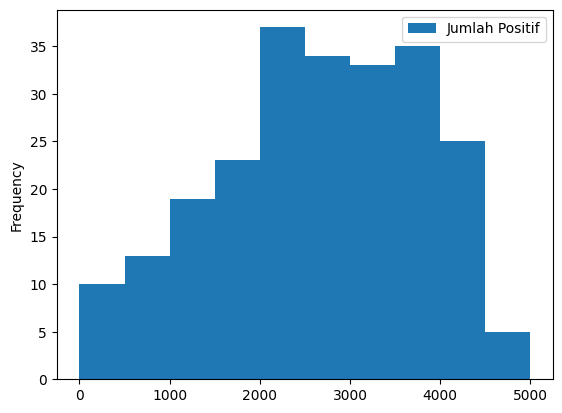

In [99]:
# Range jumlah positif per kelurahan
data[["Jumlah Positif"]].plot(kind = "hist", bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000], rwidth = 1)

<AxesSubplot: ylabel='Kelurahan'>

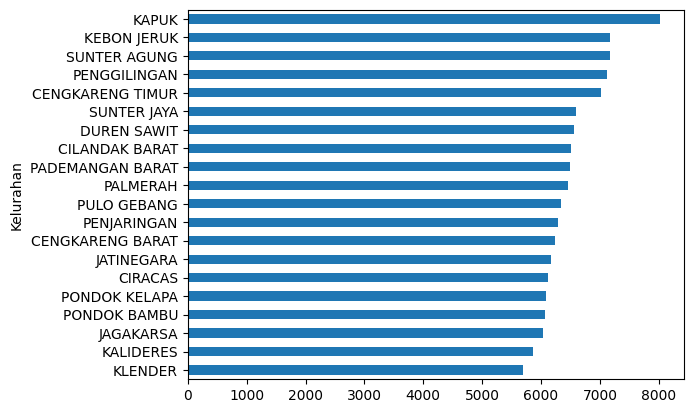

In [100]:
# 20 kelurahan dengan jumlah positif terbanyak
data.sort_values(by="Jumlah Positif").tail(20)["Jumlah Positif"].plot(kind = "barh")

<AxesSubplot: xlabel='Jumlah Positif', ylabel='Self Isolation'>

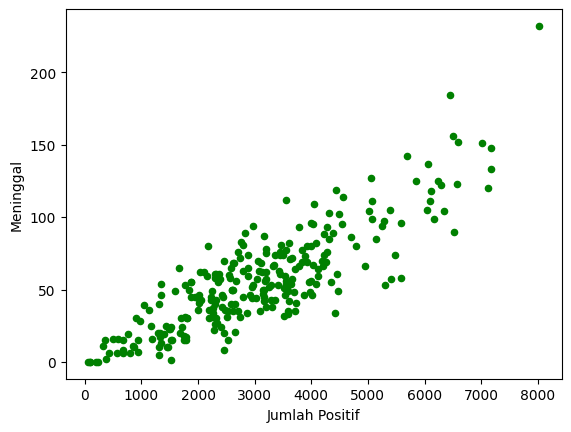

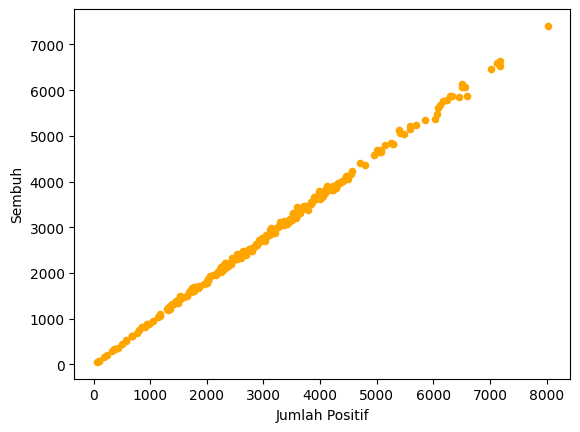

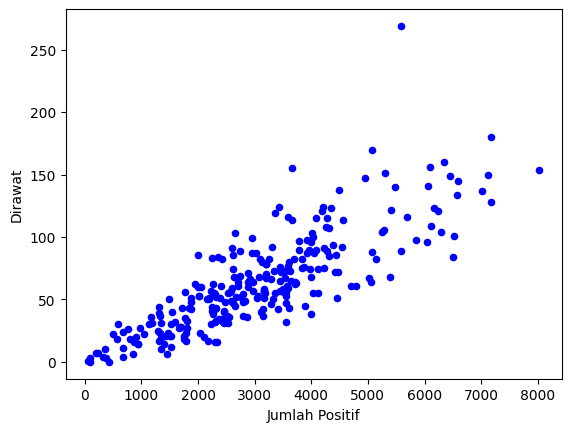

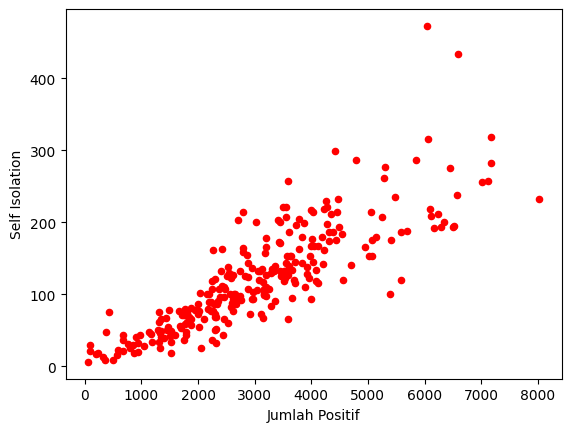

In [101]:
# Scatter plot untuk memperlihatkan kategori pasien positif
data.plot(kind = "scatter", x = "Jumlah Positif", y = "Meninggal", color = "green")
data.plot(kind = "scatter", x = "Jumlah Positif", y = "Sembuh", color = "orange")
data.plot(kind = "scatter", x = "Jumlah Positif", y = "Dirawat", color = "blue")
data.plot(kind = "scatter", x = "Jumlah Positif", y = "Self Isolation", color = "red")
# Di sini, kami memperoleh bahwa ada hubungan linear antara jumlah positif dengan jumlah meninggal, jumlah sembuh, jumlah dirawat, dan jumlah yang self isolation

# Korelasi

In [103]:
data["Jumlah Positif"].corr(data["Sembuh"])

0.99946717890213

In [104]:
data["Jumlah Positif"].corr(data["Meninggal"])

0.8525195419505824

In [105]:
data["Jumlah Positif"].corr(data["Dirawat"])

0.8244897773269734

In [106]:
data["Jumlah Positif"].corr(data["Self Isolation"])

0.8416626858759811

In [107]:
data["Dirawat"].corr(data["Meninggal"])

0.6689139355625129